In [87]:
import time
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_absolute_error

from fbprophet import Prophet
import matplotlib.pyplot as plt
from functools import reduce

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
 
plt.style.use('default')
pd.options.display.float_format = "{:,.2f}".format

In [88]:
ticker='MSFT'
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d' # 1d, 1m
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df = pd.read_csv(query_string)
df['symbol']='MSFT'
df

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
0,2015-01-02,46.66,47.42,46.54,46.76,41.01,27913900,MSFT
1,2015-01-05,46.37,46.73,46.25,46.33,40.64,39673900,MSFT
2,2015-01-06,46.38,46.75,45.54,45.65,40.04,36447900,MSFT
3,2015-01-07,45.98,46.46,45.49,46.23,40.55,29114100,MSFT
4,2015-01-08,46.75,47.75,46.72,47.59,41.74,29645200,MSFT
...,...,...,...,...,...,...,...,...
1897,2022-07-18,259.75,260.84,253.30,254.25,254.25,20975000,MSFT
1898,2022-07-19,257.58,259.72,253.68,259.53,259.53,25012600,MSFT
1899,2022-07-20,259.90,264.87,258.91,262.27,262.27,22788300,MSFT
1900,2022-07-21,259.79,264.89,257.03,264.84,264.84,22404700,MSFT


In [89]:
stock_price = df[['Date','Adj Close']]
stock_price

,Date,Adj Close
0,2015-01-02,41.01
1,2015-01-05,40.64
2,2015-01-06,40.04
3,2015-01-07,40.55
4,2015-01-08,41.74
...,...,...
1897,2022-07-18,254.25
1898,2022-07-19,259.53
1899,2022-07-20,262.27
1900,2022-07-21,264.84


In [90]:
stock_price.columns = ['ds', 'y']
stock_price['ds'] = pd.to_datetime(stock_price['ds'])
stock_price.head(10)

,ds,y
0,2015-01-02,41.01
1,2015-01-05,40.64
2,2015-01-06,40.04
3,2015-01-07,40.55
4,2015-01-08,41.74
5,2015-01-09,41.39
6,2015-01-12,40.87
7,2015-01-13,40.66
8,2015-01-14,40.31
9,2015-01-15,39.89


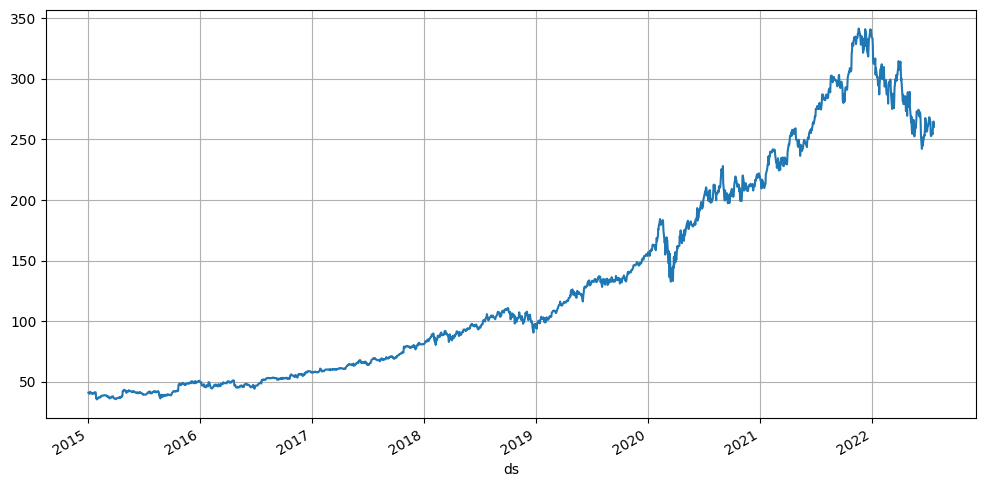

In [91]:
stock_price.set_index('ds').y.plot(figsize=(12,6), grid=True);

In [92]:
model = Prophet()
model.fit(stock_price)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [93]:
future = model.make_future_dataframe(730, freq='d')

future_boolean = future['ds'].map(lambda x : True if x.weekday() in range(0, 5) else False)
future = future[future_boolean] 

forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2417,2024-07-15,406.71,378.51,435.15
2418,2024-07-16,407.01,377.18,437.77
2419,2024-07-17,407.65,378.93,437.74
2420,2024-07-18,408.01,378.23,440.51
2421,2024-07-19,408.59,377.77,440.54


In [94]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2417,2024-07-15,409.07,378.51,435.15,387.23,433.08,-2.37,-2.37,-2.37,-0.27,-0.27,-0.27,-2.10,-2.10,-2.10,0.00,0.00,0.00,406.71
2418,2024-07-16,409.21,377.18,437.77,387.31,433.25,-2.20,-2.20,-2.20,-0.45,-0.45,-0.45,-1.75,-1.75,-1.75,0.00,0.00,0.00,407.01
2419,2024-07-17,409.34,378.93,437.74,387.40,433.41,-1.69,-1.69,-1.69,-0.31,-0.31,-0.31,-1.39,-1.39,-1.39,0.00,0.00,0.00,407.65
2420,2024-07-18,409.47,378.23,440.51,387.48,433.57,-1.47,-1.47,-1.47,-0.45,-0.45,-0.45,-1.01,-1.01,-1.01,0.00,0.00,0.00,408.01
2421,2024-07-19,409.60,377.77,440.54,387.56,433.73,-1.01,-1.01,-1.01,-0.38,-0.38,-0.38,-0.64,-0.64,-0.64,0.00,0.00,0.00,408.59


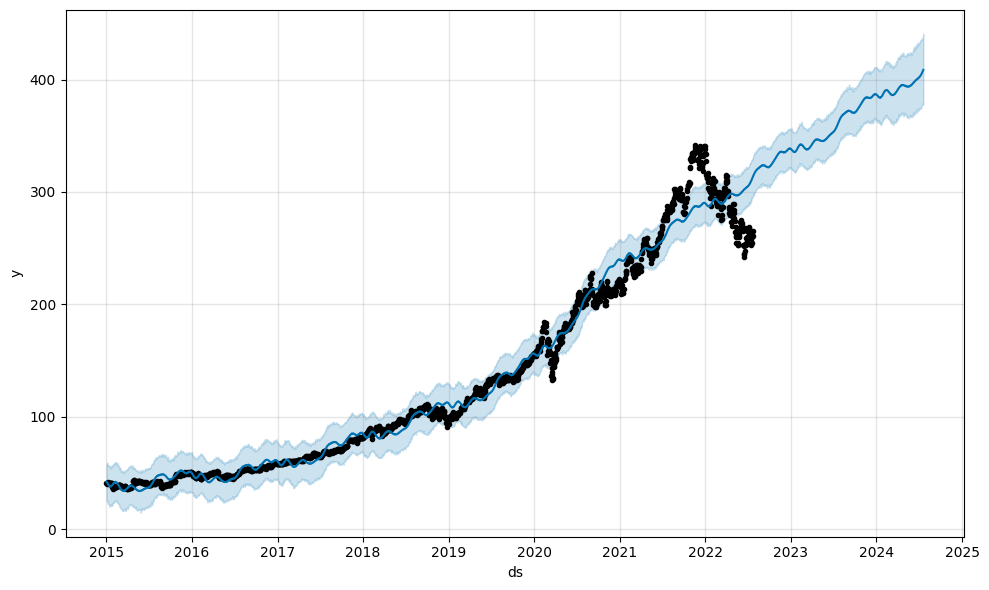

In [95]:
model.plot(forecast);

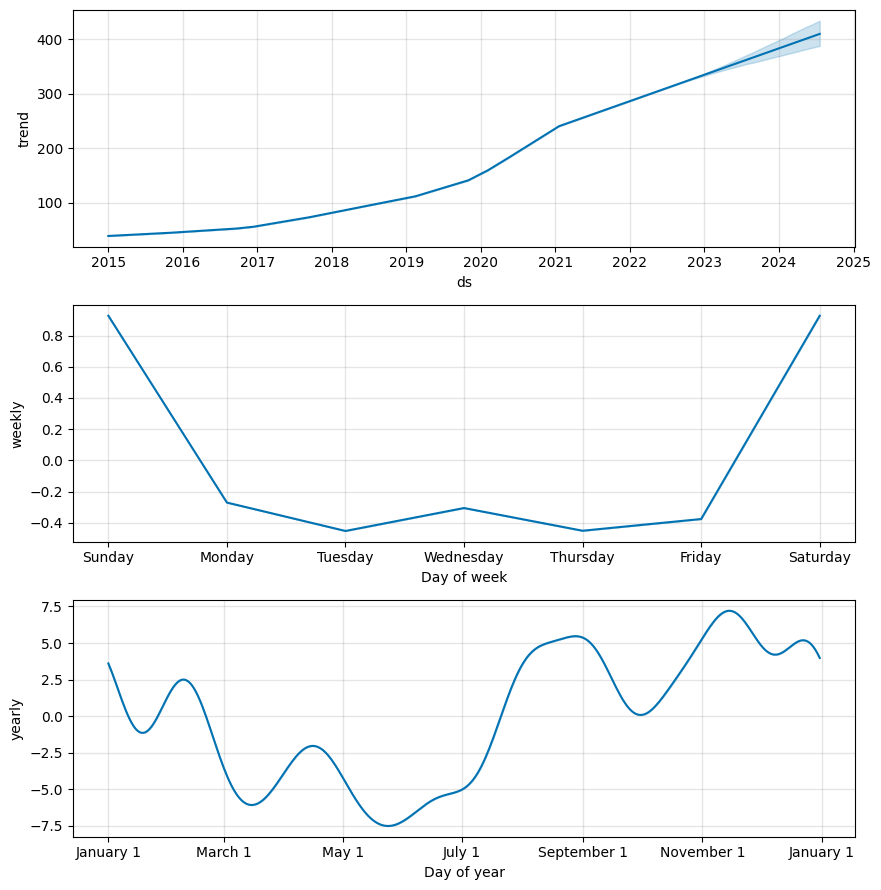

In [96]:
model.plot_components(forecast);

In [97]:
stock_price_forecast = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(stock_price, stock_price_forecast, on='ds', how='right')

In [98]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [99]:
for err_name, err_value in calculate_forecast_errors(df, future.shape[0]).items():
    print(err_name, err_value)

MAPE 6.3889839474178824
MAE 8.545890365449333


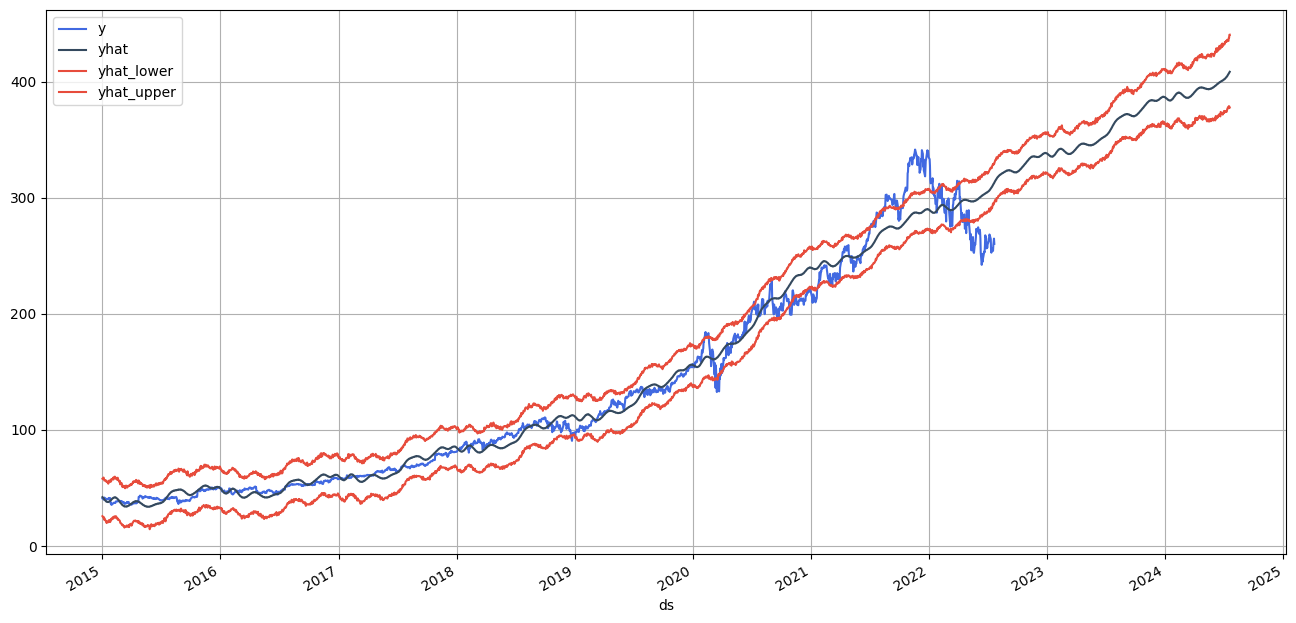

In [100]:
df.set_index('ds').plot(figsize=(16,8), color=['royalblue', "#34495e", "#e74c3c", "#e74c3c"], grid=True);